# Allocating Resources After a Major Weather Event

You’ve learned to explore data and communicate your findings. Now, you’ll apply these skills to analyze a specific weather event and provide recommendations based on the conclusions you reach. Make sure to do the Reading introducing the final assignment. It contains important information to help you complete the tasks listed below.

Imagine you’ve been hired as a data science consultant for an insurance company to help determine where to send people after Hurricane Harvey. Your job is to create a report providing a recommendation on where the insurance company should send people. You’re expected to base your recommendation on available data.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',50)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("project.csv", parse_dates=['Begin_Date_Time','End_Date_Time'])

In [3]:
df

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
0,113355,678791,NEW JERSEY,2017,April,Thunderstorm Wind,GLOUCESTER,2017-06-04 15:09:00,EST-5,2017-06-04 15:09:00,0,0,0,0,NaN,NaN,NaN,NaN,39.6600,-75.0800,39.6600,-75.0800,Low pressure tracked from the Ohio Valley into...,A couple of trees were taken down due to thund...
1,113459,679228,FLORIDA,2017,April,Tornado,LEE,2017-06-04 09:30:00,EST-5,2017-06-04 09:40:00,1,0,0,0,110.0,110000.0,0.0,0.0,26.5010,-81.9980,26.5339,-81.8836,A line of thunderstorms developed along a pref...,Emergency management reported and broadcast me...
2,113448,679268,OHIO,2017,April,Thunderstorm Wind,GREENE,2017-05-04 17:49:00,EST-5,2017-05-04 17:53:00,0,0,0,0,1.0,1000.0,0.0,0.0,39.8500,-83.9900,39.8500,-83.9900,Showers and thunderstorms developed ahead of a...,An entire tree was uprooted in a yard on Dayto...
3,113697,682042,OHIO,2017,April,Flood,CLERMONT,2017-04-16 17:59:00,EST-5,2017-04-16 19:00:00,0,0,0,0,5.0,5000.0,0.0,0.0,39.1065,-84.2875,39.1061,-84.2874,Thunderstorms with very heavy rain developed a...,Garage of a home was flooded by high water.
4,113683,682062,NEBRASKA,2017,April,Hail,CASS,2017-04-15 15:50:00,CST-6,2017-04-15 15:50:00,0,0,0,0,0.0,0.0,0.0,0.0,40.9800,-95.8900,40.9800,-95.8900,An upper level storm system moved into Nebrask...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57000,119111,716157,IOWA,2017,July,Flash Flood,JOHNSON,2017-07-21 17:05:00,CST-6,2017-07-21 20:05:00,0,0,0,0,0.0,0.0,0.0,0.0,41.6781,-91.5614,41.6473,-91.5621,Another round of convective storms fired along...,The county emergency manager reported a few ca...
57001,117398,715844,PENNSYLVANIA,2017,July,Flash Flood,FAYETTE,2017-07-28 17:10:00,EST-5,2017-07-29 05:00:00,0,0,0,0,60.0,60000.0,0.0,0.0,39.8998,-79.7412,39.9132,-79.7256,Unusually strong upper low for July dropped fr...,Local 911 reported multiple streets flooded wi...
57002,117398,715845,PENNSYLVANIA,2017,July,Flash Flood,GREENE,2017-07-28 17:41:00,EST-5,2017-07-28 23:00:00,0,0,0,0,1.0,1000.0,0.0,0.0,39.9300,-80.0000,39.9316,-79.9949,Unusually strong upper low for July dropped fr...,Mudslide onto 355 Crucible Rd.
57003,117398,715848,PENNSYLVANIA,2017,July,Flash Flood,FAYETTE,2017-07-28 17:59:00,EST-5,2017-07-28 20:00:00,0,0,0,0,20.0,20000.0,0.0,0.0,39.8417,-79.6108,39.8410,-79.6126,Unusually strong upper low for July dropped fr...,The public reported cars becoming submerged in...


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57005 entries, 0 to 57004
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EpisodeID          57005 non-null  int64         
 1   Event_ID           57005 non-null  int64         
 2   State              57005 non-null  object        
 3   Year               57005 non-null  int64         
 4   Month              57005 non-null  object        
 5   Event_Type         57005 non-null  object        
 6   CZ_Name            57005 non-null  object        
 7   Begin_Date_Time    57005 non-null  datetime64[ns]
 8   Timezone           57005 non-null  object        
 9   End_Date_Time      57005 non-null  datetime64[ns]
 10  Injuries_Direct    57005 non-null  int64         
 11  Injuries_Indirect  57005 non-null  int64         
 12  Deaths_Direct      57005 non-null  int64         
 13  Deaths_Indirect    57005 non-null  int64         
 14  Damage

In [5]:
df.describe()

,EpisodeID,Event_ID,Year,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon
count,57005.000000,57005.000000,57005.0,57005.000000,57005.000000,57005.000000,57005.000000,46415.000000,4.641500e+04,46284.000000,4.628400e+04,39366.000000,39366.000000,39366.000000,39366.000000
mean,116590.529954,700184.634786,2017.0,0.021191,0.013297,0.008894,0.004052,12.355963,2.297800e+06,1.229683,4.133646e+04,37.613406,-90.377617,37.611714,-90.371464
std,2904.645787,17735.149368,0.0,0.583051,2.111232,0.227044,0.132850,90.014903,1.112584e+08,47.659282,1.681819e+06,5.075386,11.505664,5.076227,11.503698
min,111354.000000,664501.000000,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-14.362900,-170.837400,-14.300000,-170.689100
25%,114130.000000,685249.000000,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,34.482150,-96.820000,34.480525,-96.813200
50%,116237.000000,700218.000000,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,38.013600,-89.860000,38.018450,-89.845500
75%,118944.000000,715073.000000,2017.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+03,0.000000,0.000000e+00,41.160000,-81.850000,41.160000,-81.840000
max,127724.000000,798846.000000,2017.0,56.000000,500.000000,36.000000,20.000000,7500.000000,1.000000e+10,6500.000000,2.550000e+08,60.473600,-64.737100,60.499500,-64.739900


In [6]:
df.columns

Index(['EpisodeID', 'Event_ID', 'State', 'Year', 'Month', 'Event_Type', 'CZ_Name', 'Begin_Date_Time', 'Timezone', 'End_Date_Time', 'Injuries_Direct', 'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect', 'Damage_Property', 'Property_Cost', 'Damage_Crops', 'Crop_Cost', 'Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon', 'Episode_Narrative', 'Event_Narrative'], dtype='object')

### Data Visualization

### Univariate Data Exploration

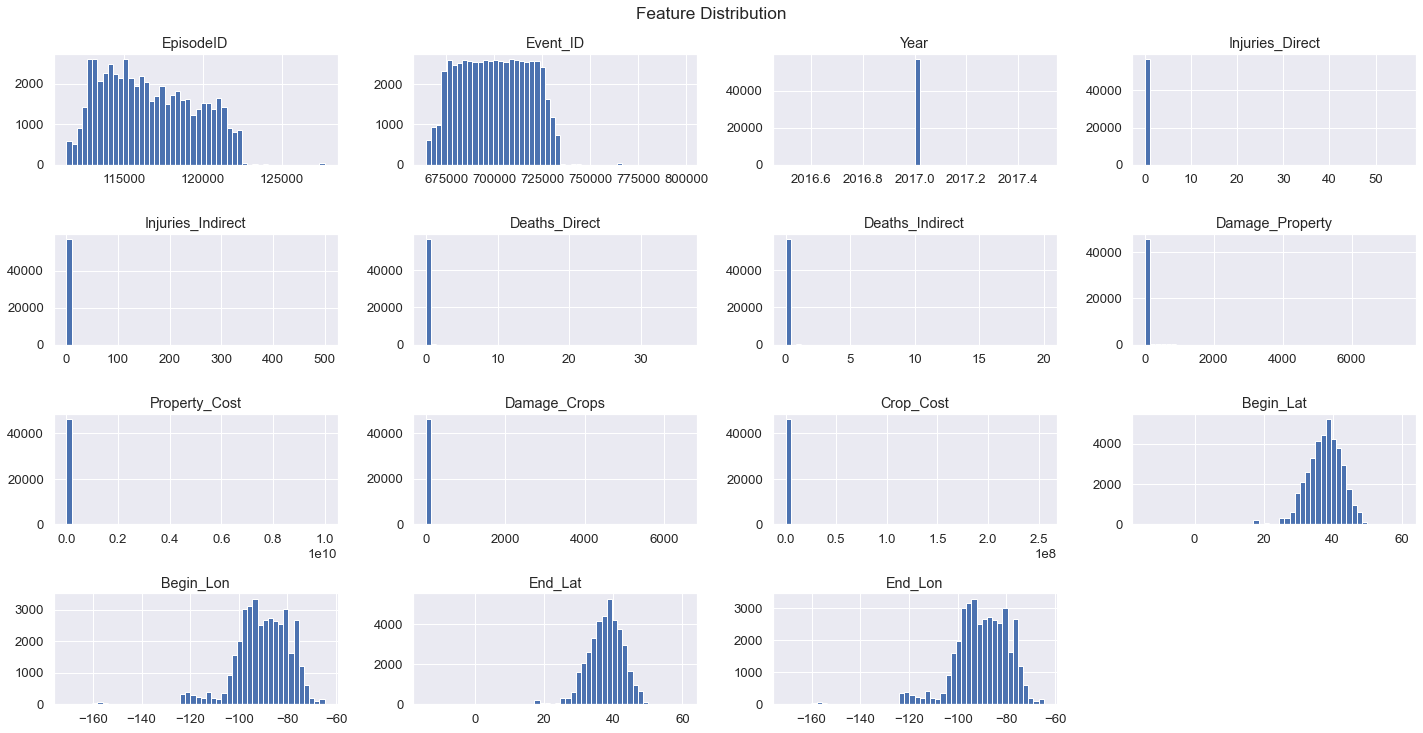

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

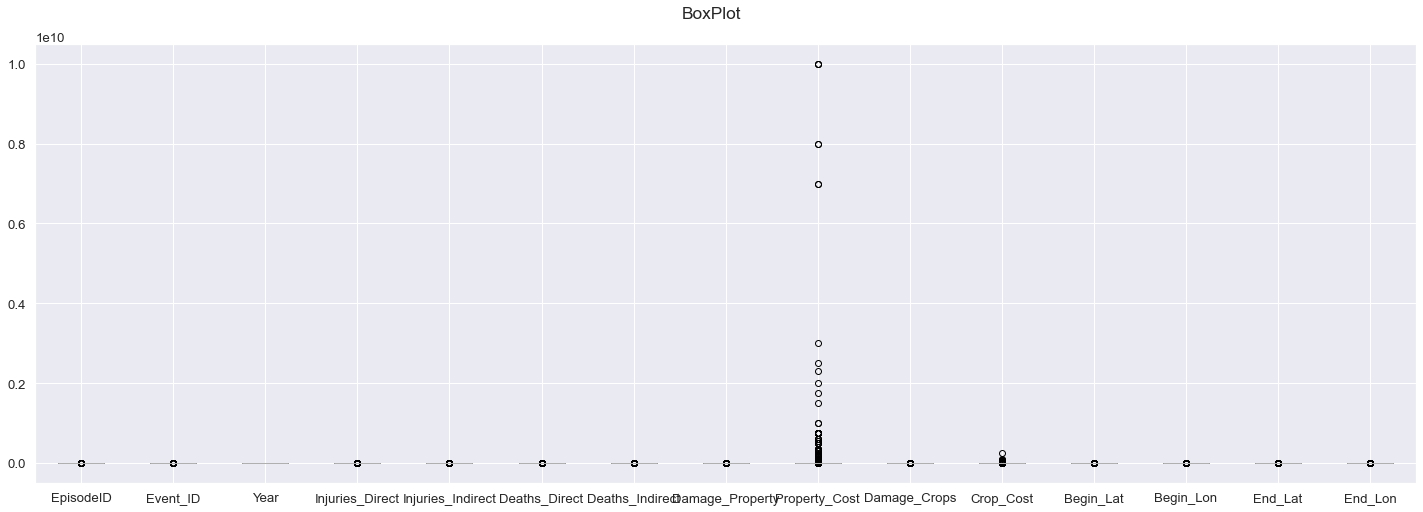

In [8]:
df.boxplot(figsize=(20,7))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
# fig = plt.figure(figsize=(20,40))

# plt.subplot(7,2,1)
# plt.title("")
# sns.countplot()

# plt.subplot(7,2,2)
# plt.title("")
# sns.countplot()

# plt.subplot(7,2,3)
# plt.title("")
# sns.countplot()

# plt.subplot(7,2,4)
# plt.title("")
# sns.countplot()


# plt.tight_layout()
# plt.show()

### Time-Series Analysis

In [10]:
timeseries = df[['Begin_Date_Time','Injuries_Direct', 'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect', 'Damage_Property', 'Property_Cost', 'Damage_Crops', 'Crop_Cost']]

In [11]:
timeseries

,Begin_Date_Time,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
0,2017-06-04 15:09:00,0,0,0,0,NaN,NaN,NaN,NaN
1,2017-06-04 09:30:00,1,0,0,0,110.0,110000.0,0.0,0.0
2,2017-05-04 17:49:00,0,0,0,0,1.0,1000.0,0.0,0.0
3,2017-04-16 17:59:00,0,0,0,0,5.0,5000.0,0.0,0.0
4,2017-04-15 15:50:00,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
57000,2017-07-21 17:05:00,0,0,0,0,0.0,0.0,0.0,0.0
57001,2017-07-28 17:10:00,0,0,0,0,60.0,60000.0,0.0,0.0
57002,2017-07-28 17:41:00,0,0,0,0,1.0,1000.0,0.0,0.0
57003,2017-07-28 17:59:00,0,0,0,0,20.0,20000.0,0.0,0.0


In [12]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57005 entries, 0 to 57004
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Begin_Date_Time    57005 non-null  datetime64[ns]
 1   Injuries_Direct    57005 non-null  int64         
 2   Injuries_Indirect  57005 non-null  int64         
 3   Deaths_Direct      57005 non-null  int64         
 4   Deaths_Indirect    57005 non-null  int64         
 5   Damage_Property    46415 non-null  float64       
 6   Property_Cost      46415 non-null  float64       
 7   Damage_Crops       46284 non-null  float64       
 8   Crop_Cost          46284 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 3.9 MB


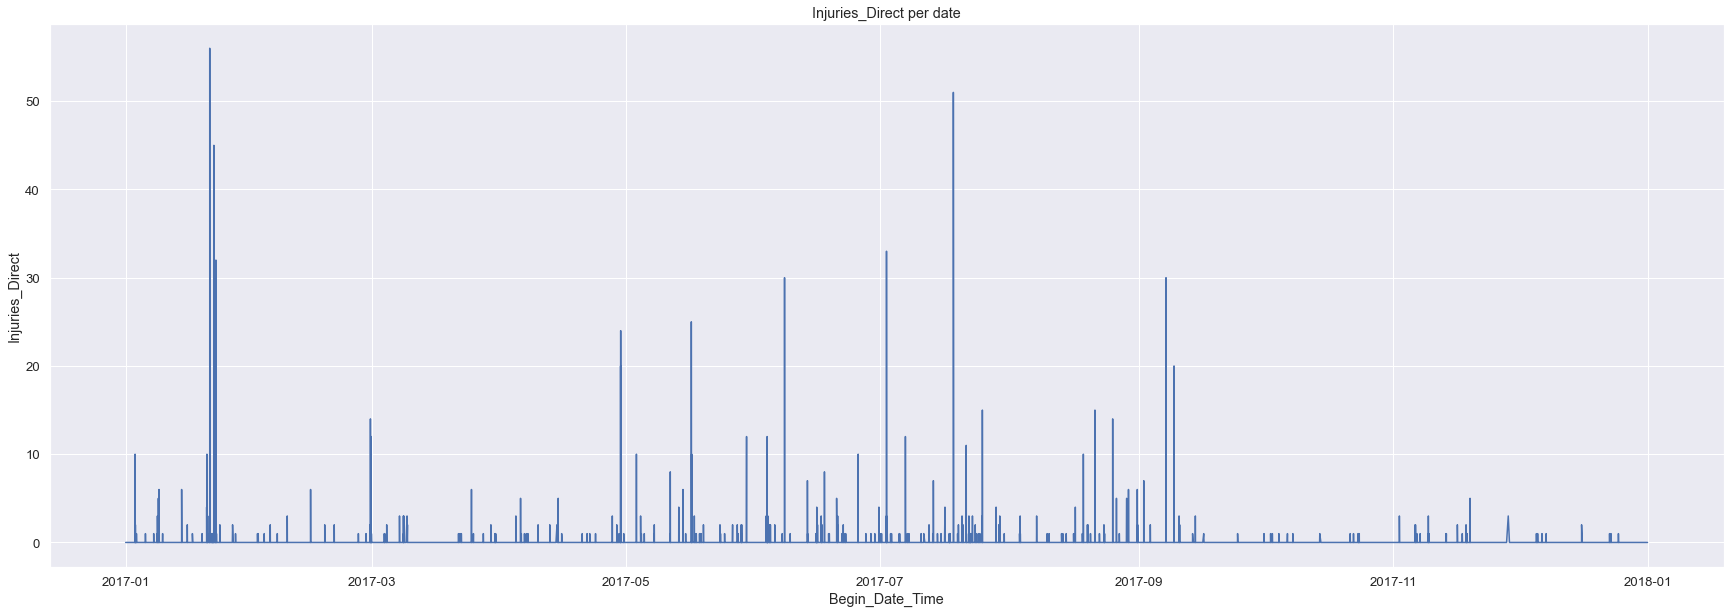

In [13]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.Begin_Date_Time,y=timeseries.Injuries_Direct,data=df, estimator=None)
plt.title("Injuries_Direct per date")
plt.show()

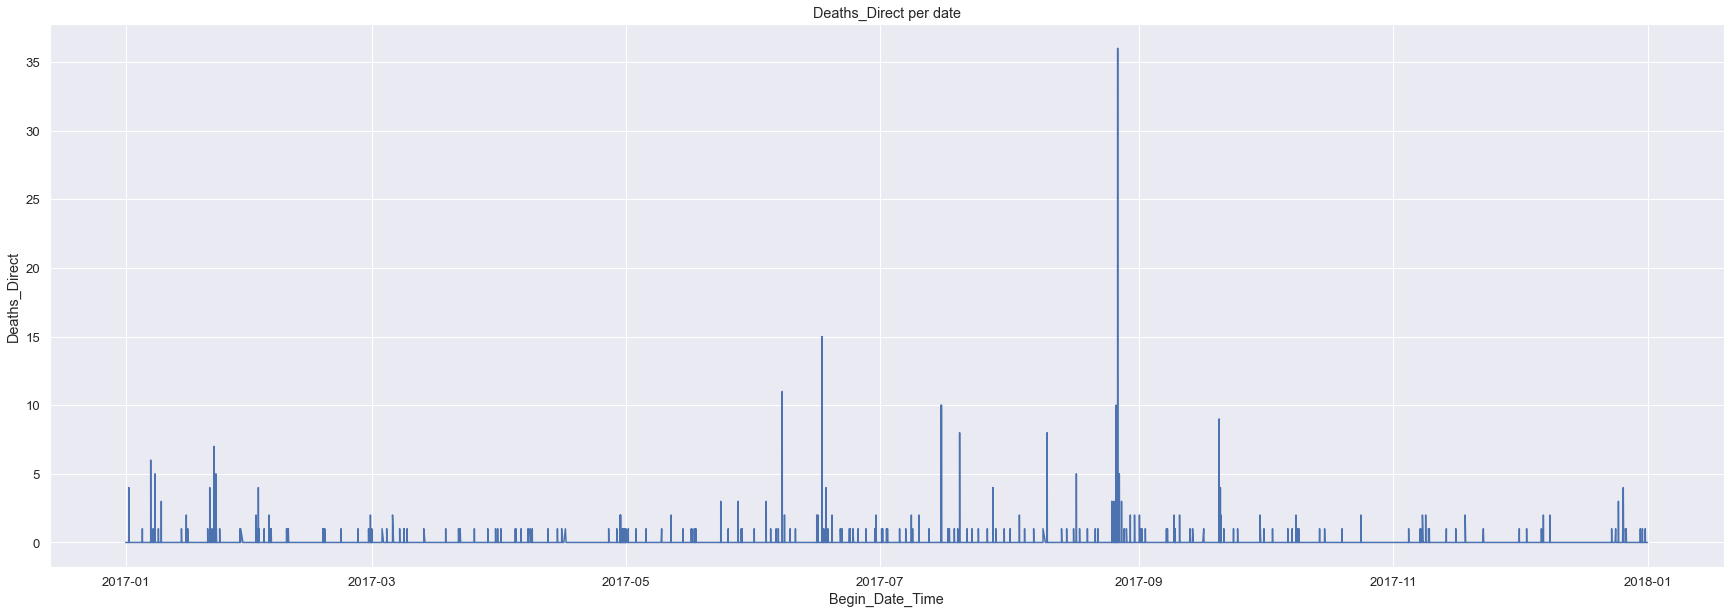

In [14]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.Begin_Date_Time,y=timeseries.Deaths_Direct,data=df, estimator=None)
plt.title("Deaths_Direct per date")
plt.show()

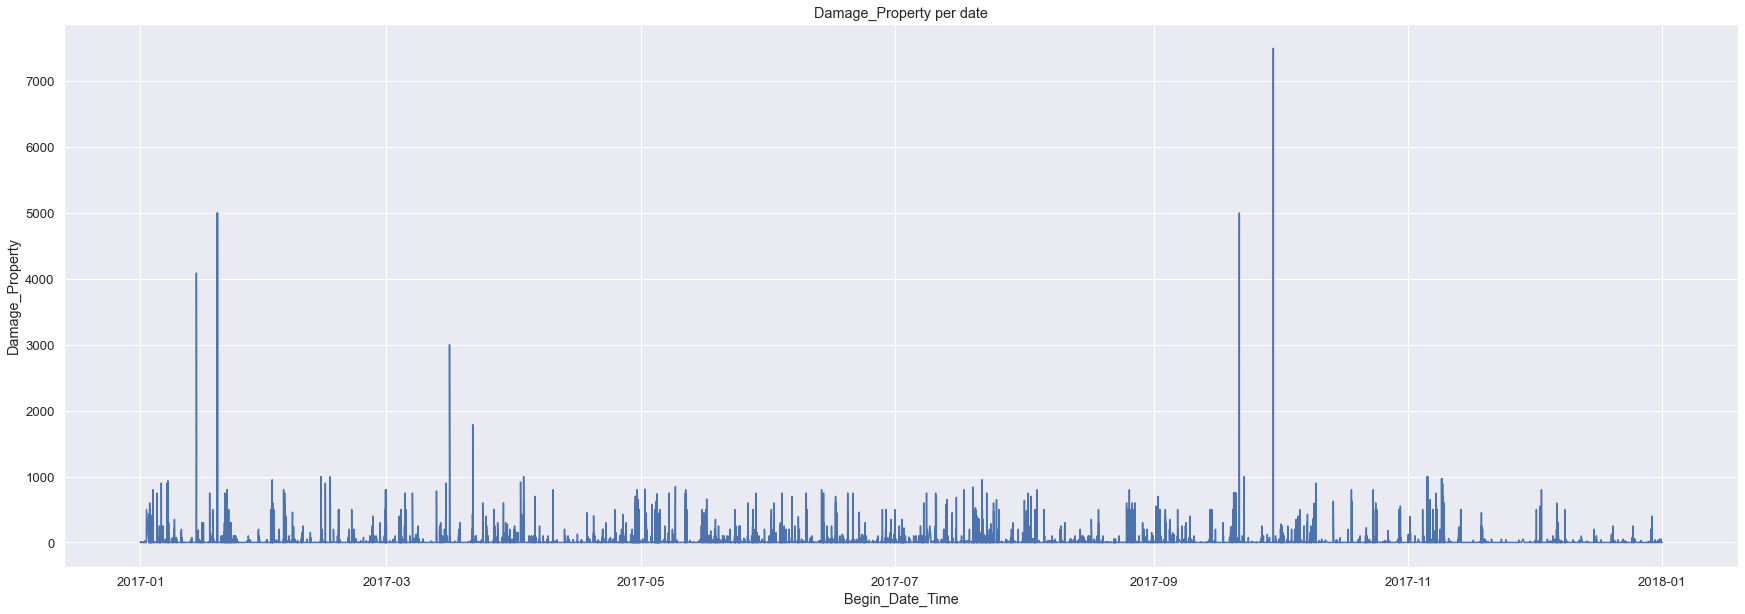

In [15]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.Begin_Date_Time,y=timeseries.Damage_Property,data=df, estimator=None)
plt.title("Damage_Property per date")
plt.show()

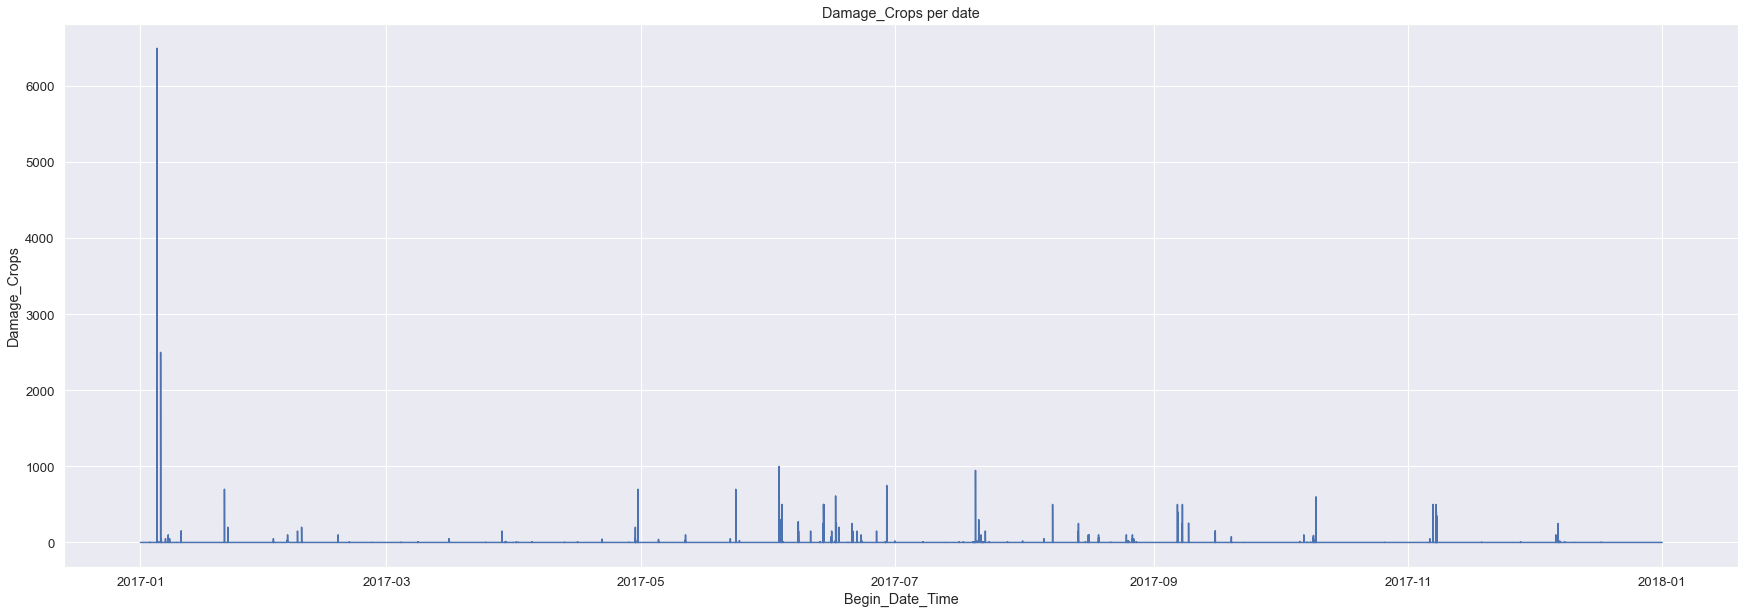

In [16]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=timeseries.Begin_Date_Time,y=timeseries.Damage_Crops,data=df, estimator=None)
plt.title("Damage_Crops per date")
plt.show()

### Drop unwanted features

In [17]:
df.columns

Index(['EpisodeID', 'Event_ID', 'State', 'Year', 'Month', 'Event_Type', 'CZ_Name', 'Begin_Date_Time', 'Timezone', 'End_Date_Time', 'Injuries_Direct', 'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect', 'Damage_Property', 'Property_Cost', 'Damage_Crops', 'Crop_Cost', 'Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon', 'Episode_Narrative', 'Event_Narrative'], dtype='object')

In [18]:
df.drop(['EpisodeID', 'Event_ID','Begin_Date_Time','Timezone','End_Date_Time','Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon', 
         'Episode_Narrative', 'Event_Narrative'], axis=1, inplace=True)

In [19]:
df.head()

,State,Year,Month,Event_Type,CZ_Name,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
0,NEW JERSEY,2017,April,Thunderstorm Wind,GLOUCESTER,0,0,0,0,NaN,NaN,NaN,NaN
1,FLORIDA,2017,April,Tornado,LEE,1,0,0,0,110.0,110000.0,0.0,0.0
2,OHIO,2017,April,Thunderstorm Wind,GREENE,0,0,0,0,1.0,1000.0,0.0,0.0
3,OHIO,2017,April,Flood,CLERMONT,0,0,0,0,5.0,5000.0,0.0,0.0
4,NEBRASKA,2017,April,Hail,CASS,0,0,0,0,0.0,0.0,0.0,0.0


### Pairplots

<Figure size 1440x1440 with 0 Axes>

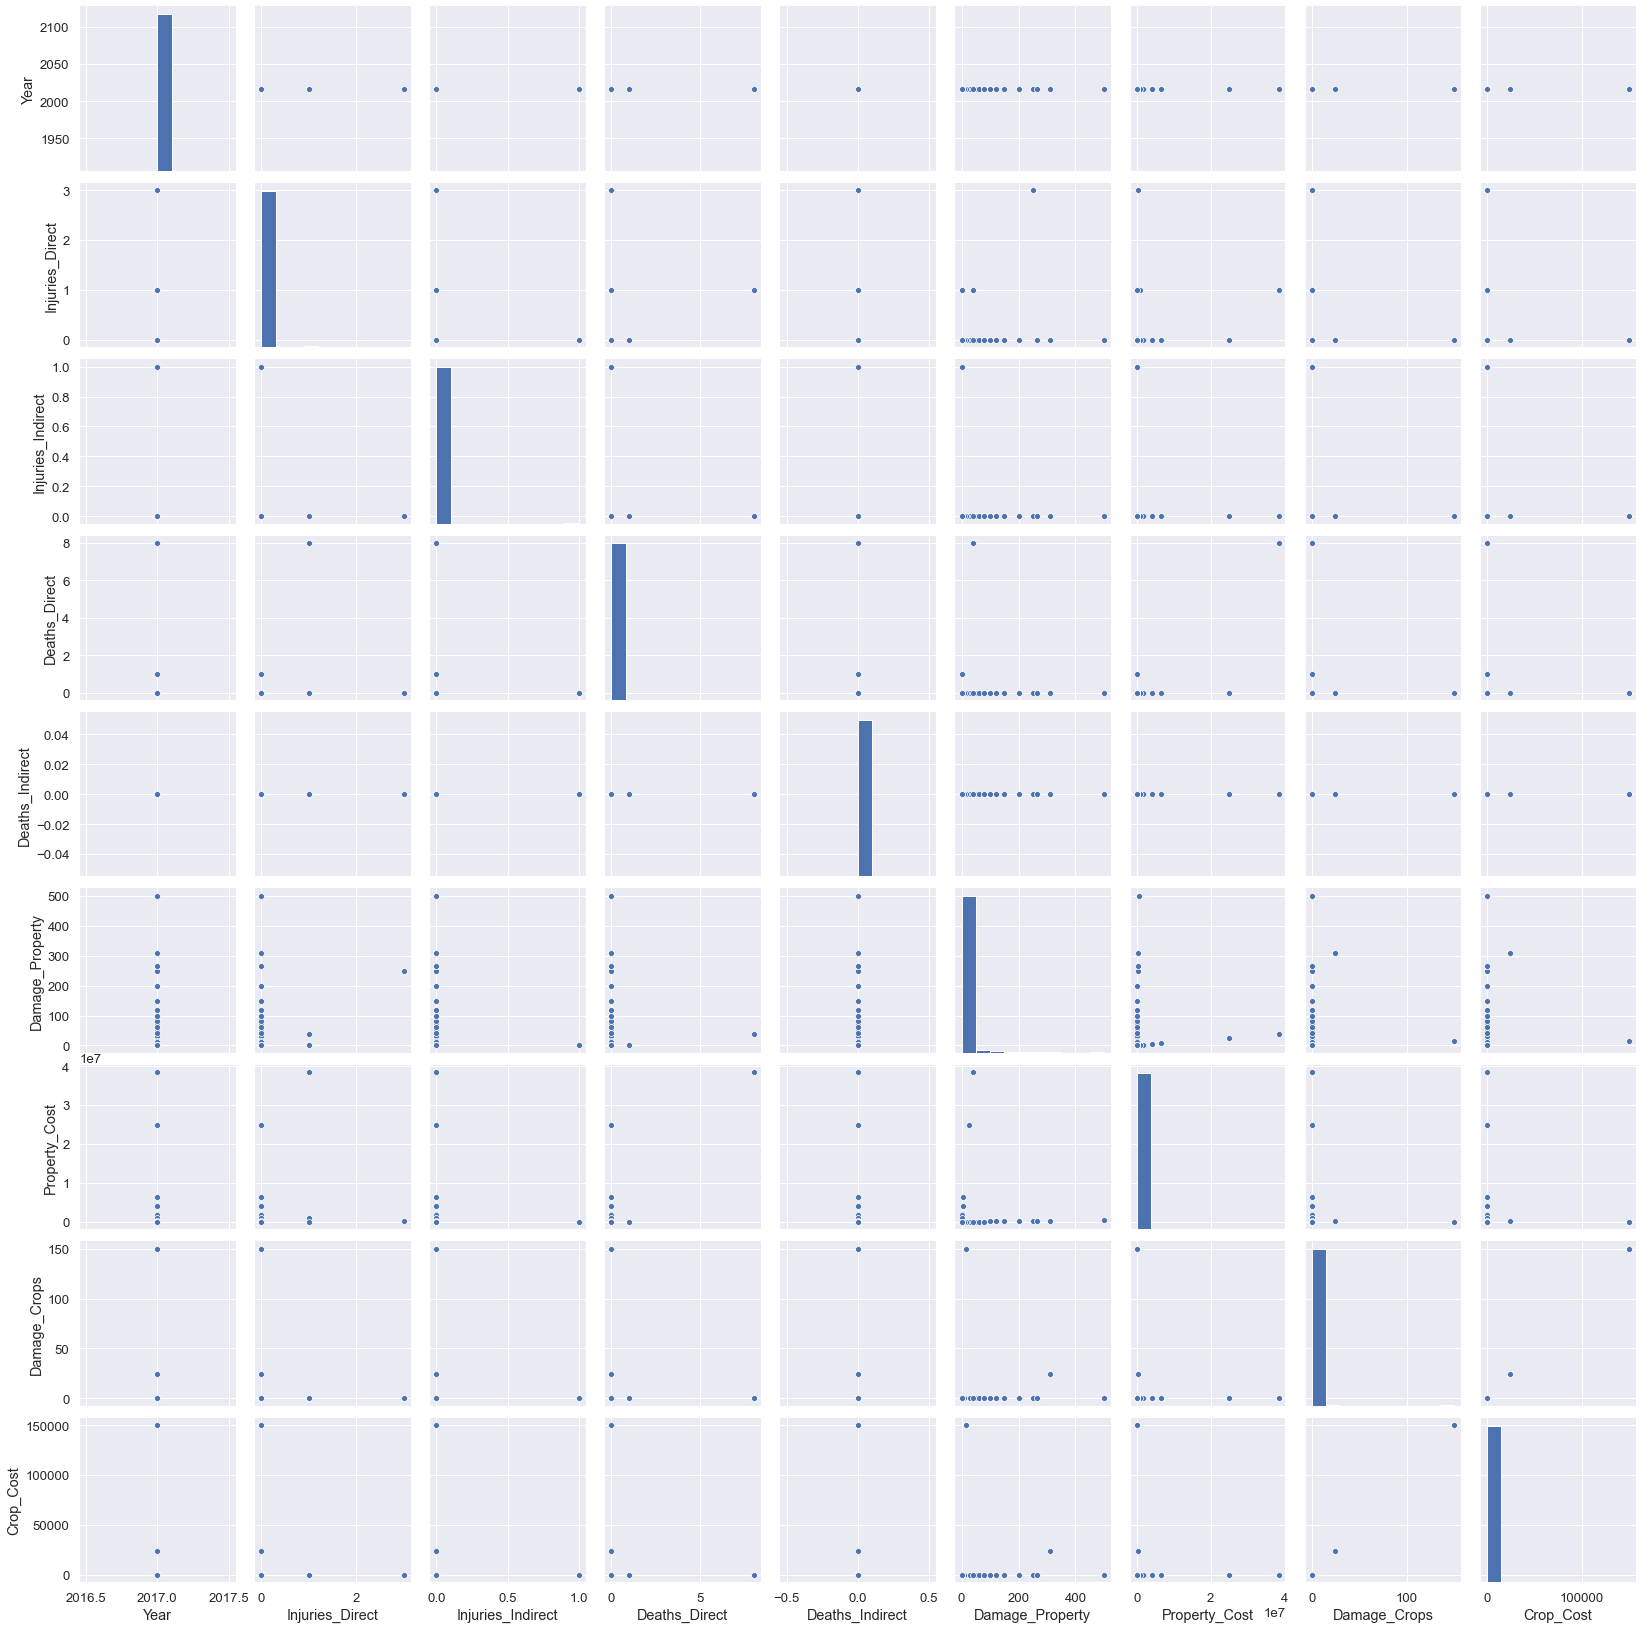

In [20]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(500))
plt.show()

### Find the two states most impacted by Hurricane Harvey in terms of total Property Cost.

In [21]:
df.describe()

,Year,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
count,57005.0,57005.000000,57005.000000,57005.000000,57005.000000,46415.000000,4.641500e+04,46284.000000,4.628400e+04
mean,2017.0,0.021191,0.013297,0.008894,0.004052,12.355963,2.297800e+06,1.229683,4.133646e+04
std,0.0,0.583051,2.111232,0.227044,0.132850,90.014903,1.112584e+08,47.659282,1.681819e+06
min,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,2017.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+03,0.000000,0.000000e+00
max,2017.0,56.000000,500.000000,36.000000,20.000000,7500.000000,1.000000e+10,6500.000000,2.550000e+08


In [22]:
df.sort_values(by='Property_Cost', ascending=False).head(50)

,State,Year,Month,Event_Type,CZ_Name,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
56250,TEXAS,2017,August,Flash Flood,GALVESTON,0,0,3,3,10.00,1.000000e+10,10.0,10000.0
56373,TEXAS,2017,August,Flash Flood,HARRIS,0,0,36,2,10.00,1.000000e+10,100.0,100000.0
35115,TEXAS,2017,August,Tropical Storm,GALVESTON,0,0,3,3,10.00,1.000000e+10,NaN,NaN
34851,TEXAS,2017,August,Tropical Storm,FORT BEND,0,0,3,0,8.00,8.000000e+09,NaN,NaN
56234,TEXAS,2017,August,Flash Flood,FORT BEND,0,0,3,0,8.00,8.000000e+09,50.0,50000.0
56265,TEXAS,2017,August,Flash Flood,MONTGOMERY,0,0,3,1,7.00,7.000000e+09,10.0,10000.0
33599,TEXAS,2017,August,Tropical Storm,MONTGOMERY,0,0,3,1,7.00,7.000000e+09,NaN,NaN
37360,TEXAS,2017,August,Flash Flood,JEFFERSON,1,0,5,0,3.00,3.000000e+09,0.0,0.0
370,PUERTO RICO,2017,September,Flash Flood,TOA BAJA,0,0,9,0,2.50,2.500000e+09,0.0,0.0
50695,COLORADO,2017,May,Hail,JEFFERSON,0,0,0,0,2.30,2.300000e+09,NaN,NaN


**State Texas and Puerto Rico**

### Create a table of events related to Hurricane Harvey for the two states found above. Include a preview of the table so that the peer-reviewer can verify the table.

In [23]:
texas = df[df['State'] == 'TEXAS']

In [24]:
texas

,State,Year,Month,Event_Type,CZ_Name,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
113,TEXAS,2017,May,Hail,HENDERSON,0,0,0,0,1.0,1000.0,0.0,0.0
197,TEXAS,2017,January,Tornado,BOSQUE,0,0,0,0,90.0,90000.0,0.0,0.0
198,TEXAS,2017,January,Thunderstorm Wind,DALLAS,0,0,0,0,5.0,5000.0,0.0,0.0
199,TEXAS,2017,January,Thunderstorm Wind,LEON,0,0,0,0,0.0,0.0,0.0,0.0
200,TEXAS,2017,January,Thunderstorm Wind,ELLIS,0,0,0,0,15.0,15000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56593,TEXAS,2017,January,Tornado,DALLAS,0,0,0,0,120.0,120000.0,0.0,0.0
56602,TEXAS,2017,January,Tornado,LIMESTONE,0,0,0,0,300.0,300000.0,0.0,0.0
56609,TEXAS,2017,August,Flash Flood,BASTROP,0,0,0,0,0.0,0.0,0.0,0.0
56940,TEXAS,2017,April,Hail,LEON,0,0,0,0,2.0,2000.0,0.0,0.0


### A figure showing the event type and number of occurrences of each event that occurred with Hurricane Harvey in the two states identified above.

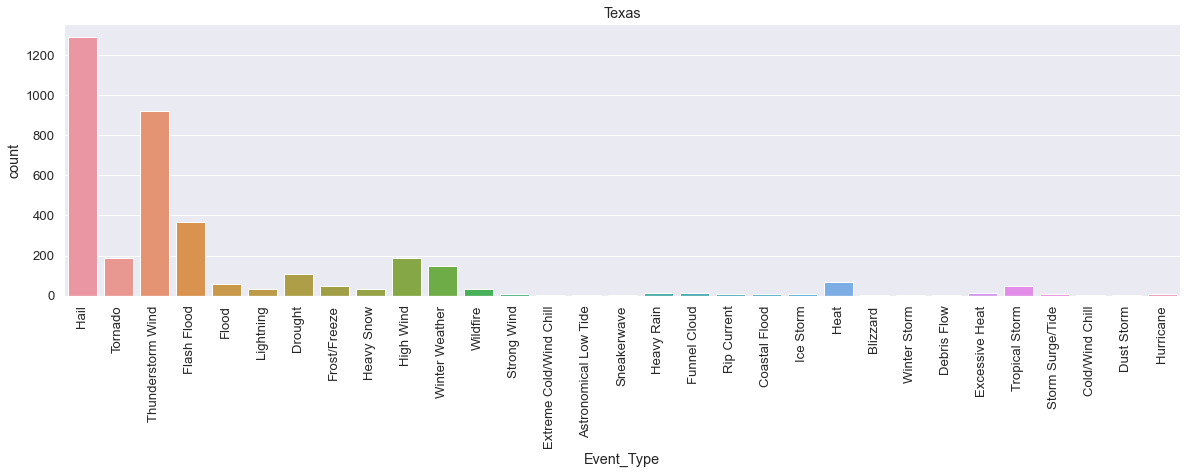

In [25]:
fig = plt.figure(figsize=(20,5))
plt.title("Texas")
plt.xticks(rotation=90)
sns.countplot(texas.Event_Type)
plt.show()

In [26]:
puertorico = df[df['State'] == 'PUERTO RICO']

In [27]:
puertorico

,State,Year,Month,Event_Type,CZ_Name,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
352,PUERTO RICO,2017,September,Hurricane,EASTERN INTERIOR,0,0,0,0,500.0,500000.0,0.0,0.0
353,PUERTO RICO,2017,September,Hurricane,EASTERN INTERIOR,0,0,0,0,500.0,500000.0,0.0,0.0
354,PUERTO RICO,2017,September,Flash Flood,COAMO,0,0,0,0,500.0,500000.0,0.0,0.0
355,PUERTO RICO,2017,September,Flash Flood,COROZAL,0,0,0,0,500.0,500000.0,0.0,0.0
356,PUERTO RICO,2017,September,Hurricane,CENTRAL INTERIOR,0,0,0,0,500.0,500000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56617,PUERTO RICO,2017,September,Flash Flood,AGUAS BUENAS,0,0,0,0,177.0,177000.0,0.0,0.0
56618,PUERTO RICO,2017,September,Flash Flood,CAROLINA,0,0,0,0,250.0,250000.0,0.0,0.0
56622,PUERTO RICO,2017,September,Flash Flood,CANOVANAS,0,0,0,0,500.0,500000.0,0.0,0.0
56623,PUERTO RICO,2017,September,Flash Flood,CEIBA,0,0,0,0,250.0,250000.0,0.0,0.0


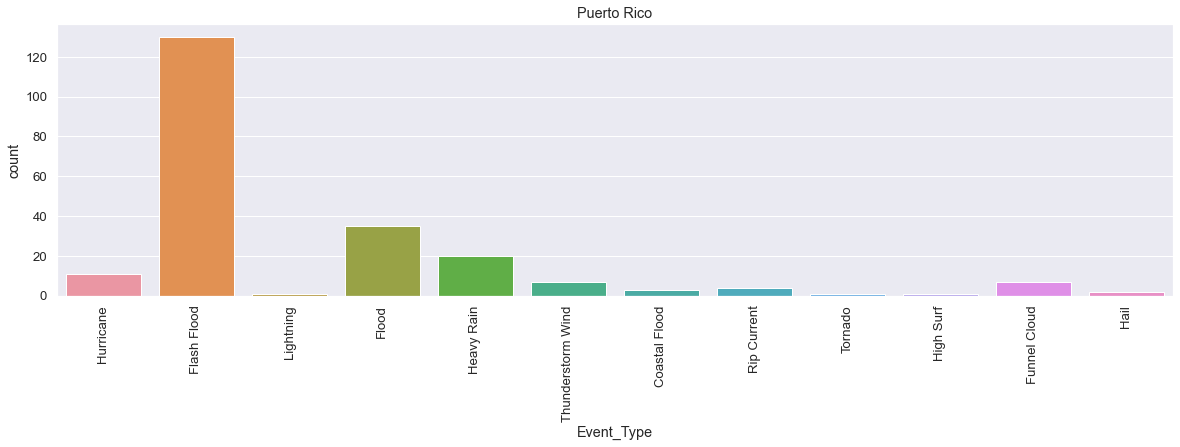

In [28]:
fig = plt.figure(figsize=(20,5))
plt.title("Puerto Rico")
plt.xticks(rotation=90)
sns.countplot(puertorico.Event_Type)
plt.show()

### Explore the data to find the counties most affected by Hurricane Harvey. Identify the counties requested by the insurance company below.

In [29]:
df.sort_values(by='Property_Cost', ascending=False).head(50)

,State,Year,Month,Event_Type,CZ_Name,Injuries_Direct,Injuries_Indirect,Deaths_Direct,Deaths_Indirect,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost
56250,TEXAS,2017,August,Flash Flood,GALVESTON,0,0,3,3,10.00,1.000000e+10,10.0,10000.0
56373,TEXAS,2017,August,Flash Flood,HARRIS,0,0,36,2,10.00,1.000000e+10,100.0,100000.0
35115,TEXAS,2017,August,Tropical Storm,GALVESTON,0,0,3,3,10.00,1.000000e+10,NaN,NaN
34851,TEXAS,2017,August,Tropical Storm,FORT BEND,0,0,3,0,8.00,8.000000e+09,NaN,NaN
56234,TEXAS,2017,August,Flash Flood,FORT BEND,0,0,3,0,8.00,8.000000e+09,50.0,50000.0
56265,TEXAS,2017,August,Flash Flood,MONTGOMERY,0,0,3,1,7.00,7.000000e+09,10.0,10000.0
33599,TEXAS,2017,August,Tropical Storm,MONTGOMERY,0,0,3,1,7.00,7.000000e+09,NaN,NaN
37360,TEXAS,2017,August,Flash Flood,JEFFERSON,1,0,5,0,3.00,3.000000e+09,0.0,0.0
370,PUERTO RICO,2017,September,Flash Flood,TOA BAJA,0,0,9,0,2.50,2.500000e+09,0.0,0.0
50695,COLORADO,2017,May,Hail,JEFFERSON,0,0,0,0,2.30,2.300000e+09,NaN,NaN


### Identify the three counties in each state with the most events in the data set. 

In [30]:
df.groupby("CZ_Name")["State","Event_Type"].count()

,State,Event_Type
CZ_Name,,
5NM E OF FAIRPORT MI TO ROCK ISLAND PASSAGE,1,1
5NM E OF MACKINAC BRIDGE TO PRESQUE ISLE LIGHT MI INC BOIS BLANC ISLAND,2,2
ABBEVILLE,3,3
ABSAROKA MOUNTAINS,23,23
ABSAROKEE / BEARTOOTH MOUNTAINS,12,12
...,...,...
YUMA,32,32
YUMA COUNTY,3,3
ZAPATA,11,11


In [31]:
eventtype = df.groupby("CZ_Name")["State","Event_Type"].count()

In [32]:
eventtype

,State,Event_Type
CZ_Name,,
5NM E OF FAIRPORT MI TO ROCK ISLAND PASSAGE,1,1
5NM E OF MACKINAC BRIDGE TO PRESQUE ISLE LIGHT MI INC BOIS BLANC ISLAND,2,2
ABBEVILLE,3,3
ABSAROKA MOUNTAINS,23,23
ABSAROKEE / BEARTOOTH MOUNTAINS,12,12
...,...,...
YUMA,32,32
YUMA COUNTY,3,3
ZAPATA,11,11


In [33]:
eventtype.sort_values(by="Event_Type", ascending=False)

,State,Event_Type
CZ_Name,,
JEFFERSON,445,445
WASHINGTON,440,440
JACKSON,436,436
FRANKLIN,416,416
MONTGOMERY,386,386
...,...,...
MAUI COUNTY LEEWARD WATERS,1,1
MECOSTA,1,1
MENDOCINO COAST,1,1


### Identify the three counties in each state with the highest total property cost

In [34]:
df.groupby("CZ_Name")["Property_Cost","State"].sum()

,Property_Cost
CZ_Name,
5NM E OF FAIRPORT MI TO ROCK ISLAND PASSAGE,0.0
5NM E OF MACKINAC BRIDGE TO PRESQUE ISLE LIGHT MI INC BOIS BLANC ISLAND,0.0
ABBEVILLE,10000.0
ABSAROKA MOUNTAINS,0.0
ABSAROKEE / BEARTOOTH MOUNTAINS,0.0
...,...
YUMA,223300.0
YUMA COUNTY,0.0
ZAPATA,20000.0


In [35]:
cost = df.groupby("CZ_Name")["Property_Cost","State"].sum()

In [36]:
cost.sort_values(by='Property_Cost', ascending=False)

,Property_Cost
CZ_Name,
GALVESTON,2.000040e+10
FORT BEND,1.600632e+10
MONTGOMERY,1.400712e+10
HARRIS,1.000224e+10
JEFFERSON,5.305488e+09
...,...
LINCOLN COUNTY EXCEPT THE SHEEP RANGE,0.000000e+00
LEWISTON AREA,0.000000e+00
LEWIS AND SOUTHERN NEZ PERCE,0.000000e+00


### Where should the insurance company send people to? Make a recommendation of which county or counties should be prioritized. 